# **Phase 3:**

# Read Dataset:

In [84]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline

data = pd.read_csv("Dataset/Preprocessed_data.csv")
data.head()


,FastingBloodSugar,HbA1c,FrequentUrination,Hypertension,ExcessiveThirst,UnexplainedWeightLoss,DiastolicBP,Smoking,SystolicBP,FamilyHistoryDiabetes,Diagnosis
0,0.720868,0.881839,0,0,0,0,0.220339,1,0.033708,1,1
1,0.910763,0.555064,0,0,0,0,0.661017,0,0.842697,0,1
2,0.443775,0.013416,0,0,0,0,0.525424,0,0.325843,1,0
3,0.097133,0.419758,0,0,0,0,0.457627,1,0.887640,1,0
4,0.159161,0.267887,0,0,0,0,0.152542,0,0.842697,0,0


**Define Features and Target Variable** 

- **Features (X):** All independent variables used for prediction.  
- **Target (y):** The dependent variable we want to predict the Diagnosis column (0 = No Diabetes, 1 = Diabetes).


In [42]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Information Gain (Entropy):

* Splitting Data into 80% Training and 20% Test:

In [43]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Entropy – 80/20):

In [44]:
# Train model
clf_entropy_80 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_80.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_80.predict(X_test)

# Evaluation
acc_entropy_80 = accuracy_score(y_test, y_pred)
cm_entropy_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 80/20 Split):

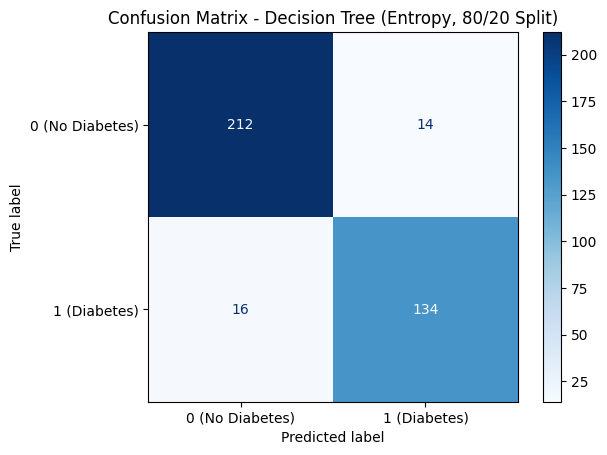

In [45]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 80/20 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 212)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 14)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 16)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 134)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 80/20 Split):

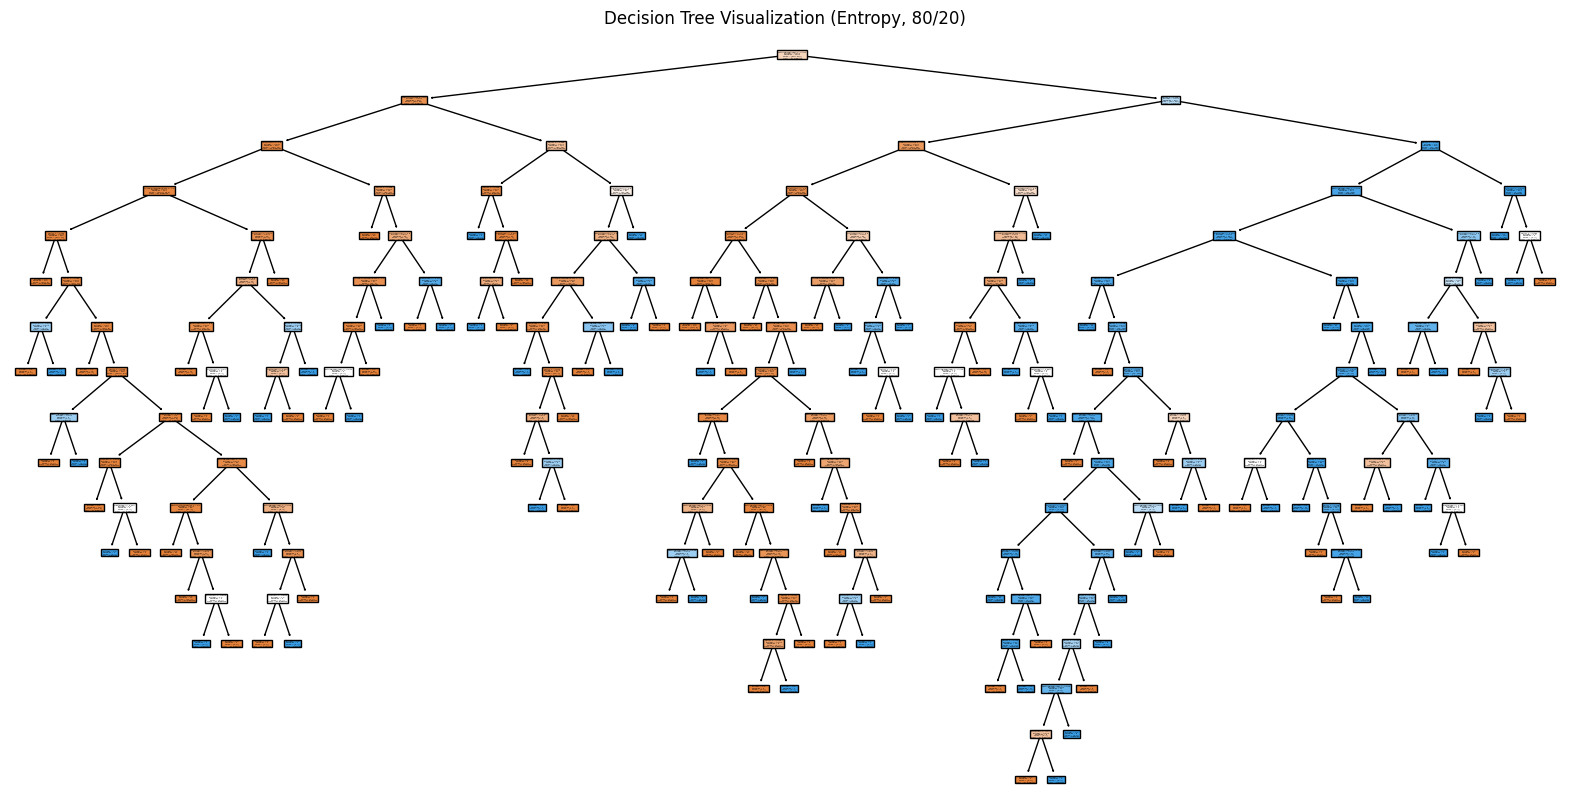

In [46]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy, 80/20)")
plt.show()

**Decision Tree Analysis (Entropy – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.



The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (92% accuracy overall), it may also be too deep, suggesting that the model could be slightly overfitted to the training data.  


* Model Evaluation Results (Entropy – 80/20 Split):

In [47]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_80)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_80, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_80 = 1 - acc_entropy_80
print("Error Rate:", round(error_rate_entropy_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_entropy_80 = cm_entropy_80[0, 0]
FP_entropy_80 = cm_entropy_80[0, 1]
FN_entropy_80 = cm_entropy_80[1, 0]
TP_entropy_80 = cm_entropy_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FN_entropy_80)
print("Sensitivity (Recall):", round(sensitivity_entropy_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_80 = TN_entropy_80 / (TN_entropy_80 + FP_entropy_80)
print("Specificity:", round(specificity_entropy_80, 4))

# Precision: positive predictive value
precision_entropy_80 = TP_entropy_80 / (TP_entropy_80 + FP_entropy_80)
print("Precision:", round(precision_entropy_80, 4))

Confusion Matrix:
 [[212  14]
 [ 16 134]]

Accuracy: 0.9202
Error Rate: 0.0798
Sensitivity (Recall): 0.8933
Specificity: 0.9381
Precision: 0.9054


**Performance Metrics Analysis (Entropy – 80/20 Split):**
- **Accuracy:** 0.9202  
  The model correctly predicted approximately **92.02%** of the test samples.
- **Error Rate:** 0.0798  
  About **7.98%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9381  
  The model correctly identified **93.81%** of non-diabetic patients (class 0).
- **Precision:** 0.9054  
  Out of all patients predicted as diabetic, **90.54%** were truly diabetic.


**Results (Entropy – 80/20 Split):** 

The model demonstrates strong overall performance with high accuracy and balanced precision and recall.  
- It performs slightly better at detecting non-diabetic patients (specificity = 93.81%) than diabetic ones (sensitivity = 89.33%).  
- This indicates that while the classifier is generally reliable, a few diabetic cases are still being missed (false negatives).  
- Considering the medical context, minimizing false negatives is crucial.

---

* Splitting Data into 75% Training and 25% Test:

In [48]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Entropy – 75/25):

In [49]:
# Train
clf_entropy_75 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_75.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_75.predict(X_test)

# Evaluation
acc_entropy_75 = accuracy_score(y_test, y_pred)
cm_entropy_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 75/25 Split):

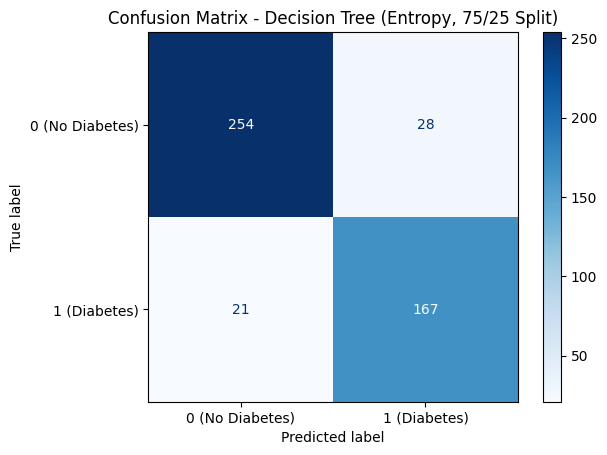

In [50]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 75/25 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 75/25 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 254)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 28)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 21)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 167)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 75/25 Split):

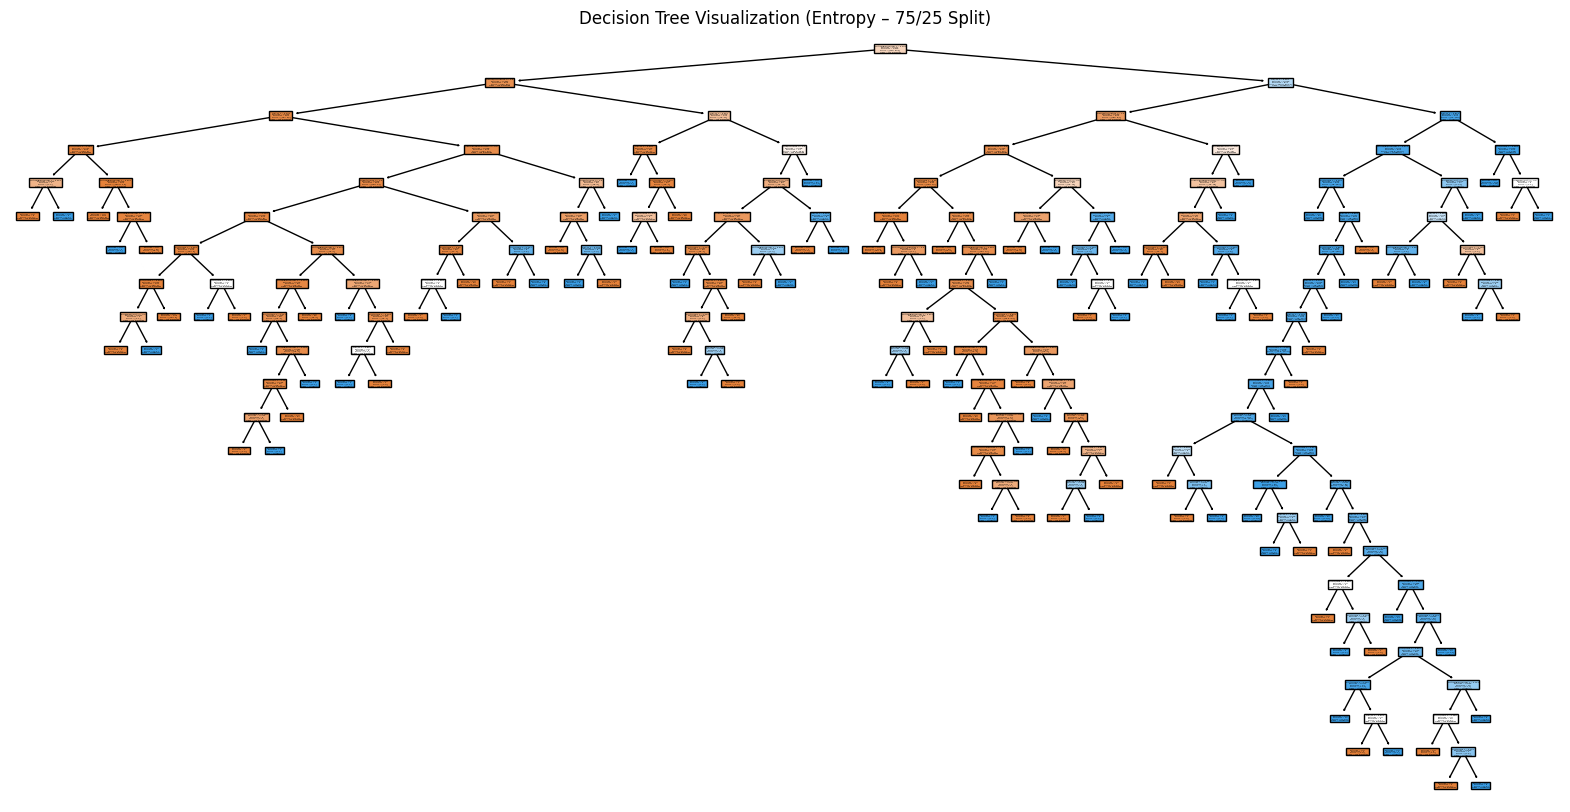

In [51]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 75/25 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 75/25 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (89.57% accuracy overall), it shows slightly less accuracy than 80/20 split.

* Model Evaluation Results (Entropy – 75/25 Split):

In [52]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_75)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_75, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_75 = 1 - acc_entropy_75
print("Error Rate:", round(error_rate_entropy_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_75 = cm_entropy_75[0, 0]
FP_75 = cm_entropy_75[0, 1]
FN_75 = cm_entropy_75[1, 0]
TP_75 = cm_entropy_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_75 = TP_75 / (TP_75 + FN_75)
print("Sensitivity (Recall):", round(sensitivity_entropy_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_75 = TN_75 / (TN_75 + FP_75)
print("Specificity:", round(specificity_entropy_75, 4))

# Precision: positive predictive value
precision_entropy_75 = TP_75 / (TP_75 + FP_75)
print("Precision:", round(precision_entropy_75, 4))

Confusion Matrix:
 [[254  28]
 [ 21 167]]

Accuracy: 0.8957
Error Rate: 0.1043
Sensitivity (Recall): 0.8883
Specificity: 0.9007
Precision: 0.8564


**Performance Metrics Analysis (Entropy – 75/25 Split):**
- **Accuracy:** 0.8957  
  The model correctly predicted approximately **89.57%** of the test samples.
- **Error Rate:** 0.1043  
  About **10.43%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8880  
  The model correctly identified **88.80%** of actual diabetic patients (class 1).
- **Specificity:** 0.9007  
  The model correctly identified **90.07%** of non-diabetic patients (class 0).
- **Precision:** 0.8564  
  Out of all patients predicted as diabetic, **85.64%** were truly diabetic.


**Results (Entropy – 75/25 Split):** 

The model shows strong and consistent performance even with a larger test set.  
- It maintains high accuracy (≈89.6%) and balanced precision and recall values.  
- The classifier performs slightly better at recognizing non-diabetic patients (specificity = 90.07%) compared to diabetic ones (sensitivity = 88.80%).  
- This means a small portion of diabetic cases were still misclassified as non-diabetic (false negatives).  
- In medical diagnosis, reducing false negatives is critical, as missing diabetic patients could delay treatment.  

---

* Splitting Data into 70% Training and 30% Test:

In [53]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Entropy – 70/30):

In [54]:
# Train
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_70.predict(X_test)

# Evaluation
acc_entropy_70 = accuracy_score(y_test, y_pred)
cm_entropy_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 70/30 Split):


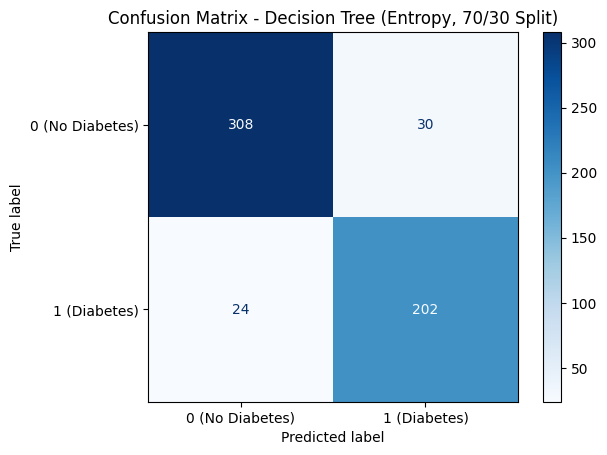

In [55]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_entropy_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 70/30 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 308)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 30)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 24)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 202)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 70/30 Split):


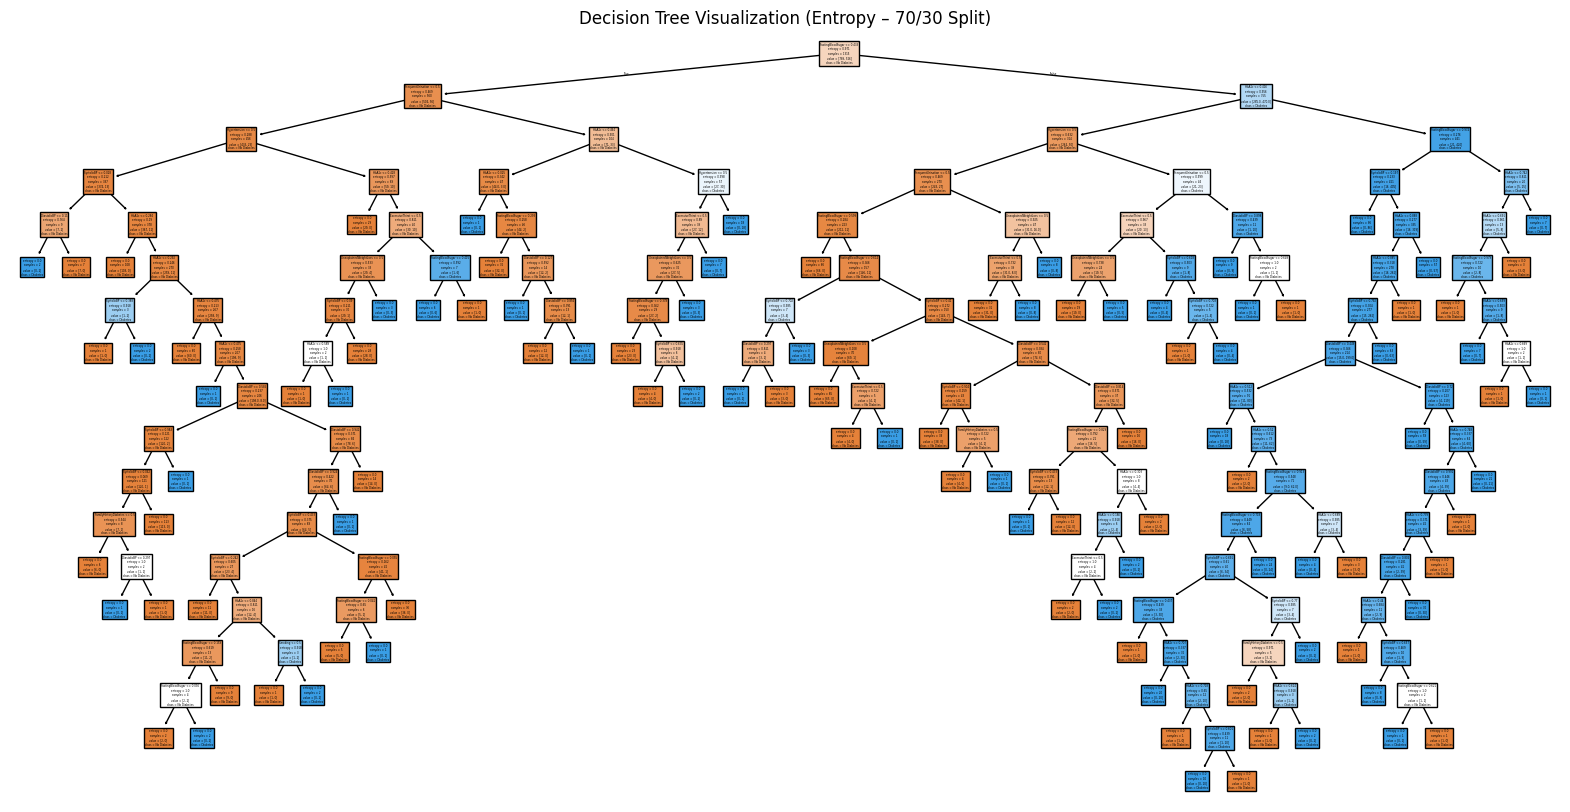

In [56]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 70/30 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 70/30 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.


* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (around 90% accuracy overall for the 70/30 split), it appears to be slightly less accurate than the previous splits due to the larger test size. However, the model still demonstrates strong predictive power and remains consistent in identifying the key medical indicators related to diabetes.


* Model Evaluation Results (Entropy – 70/30 Split):

In [57]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_entropy_70)

# print the accuracy
print("\nAccuracy:", round(acc_entropy_70, 4))

# Error Rate (1 - Accuracy)
error_rate_entropy_70 = 1 - acc_entropy_70
print("Error Rate:", round(error_rate_entropy_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_70 = cm_entropy_70[0, 0]
FP_70 = cm_entropy_70[0, 1]
FN_70 = cm_entropy_70[1, 0]
TP_70 = cm_entropy_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_entropy_70 = TP_70 / (TP_70 + FN_70)
print("Sensitivity (Recall):", round(sensitivity_entropy_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_entropy_70 = TN_70 / (TN_70 + FP_70)
print("Specificity:", round(specificity_entropy_70, 4))

# Precision: positive predictive value
precision_entropy_70 = TP_70 / (TP_70 + FP_70)
print("Precision:", round(precision_entropy_70, 4))

Confusion Matrix:
 [[308  30]
 [ 24 202]]

Accuracy: 0.9043
Error Rate: 0.0957
Sensitivity (Recall): 0.8938
Specificity: 0.9112
Precision: 0.8707


**Performance Metrics Analysis (Entropy – 70/30 Split):**
- **Accuracy:** 0.9043  
  The model correctly predicted approximately **90.43%** of the test samples.
- **Error Rate:** 0.0957  
  About **9.57%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9112  
  The model correctly identified **91.12%** of non-diabetic patients (class 0).
- **Precision:** 0.8704  
  Out of all patients predicted as diabetic, **87.04%** were truly diabetic.


**Results (Entropy – 70/30 Split):**

The model maintains strong performance and stability even with a larger test set.  
- It achieves 90.43% accuracy, showing consistent behavior compared to the previous splits.  
- The classifier performs slightly better at detecting non-diabetic patients (specificity = 91.12%) than diabetic ones (sensitivity = 89.33%).  
- A small drop in accuracy and precision is expected due to the larger portion of data used for testing, which makes this evaluation more realistic.  
- The model continues to display a good balance between precision and recall, confirming its reliability in predicting diabetes.

---

# Evaluate the models of Information Gain:

In [58]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9202", "0.0798", "0.8933", "0.9381", "0.9054"
    ],
    "75% training, 25% testing": [
        "0.8957", "0.1043", "0.8880", "0.9007", "0.8564"
    ],
    "70% training, 30% testing": [
        "0.9043", "0.0957", "0.8933", "0.9112", "0.8704"
    ]
}

# Convert to DataFrame
g = pd.DataFrame(d)

# Display styled table
g.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])


,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9202,0.8957,0.9043
1,Error Rate,0.0798,0.1043,0.0957
2,Sensitivity (Recall),0.8933,0.8880,0.8933
3,Specificity,0.9381,0.9007,0.9112
4,Precision,0.9054,0.8564,0.8704


**Analysis**
- The model maintained stable accuracy between 89% and 92% across all splits,  
  showing that it generalizes well and is not overly dependent on the training size.
- **80/20** achieved the highest accuracy (92.02%) because the model had more training samples to learn from.  
- **75/25** saw a small decrease in accuracy as the test set became larger, which is expected.  
- **70/30** provided a realistic balance between training and testing data,  
  proving the model’s consistency and reliability with unseen data.
- Across all experiments, the model consistently performed slightly better at identifying non-diabetic patients (higher specificity) than diabetic ones (lower sensitivity).  

---

# Gini Index:

* Splitting Data into 80% Training and 20% Test:

In [59]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Gini Index – 80/20):

In [60]:
# Train
clf_gini_80 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_80.fit(X_train, y_train)

# Predict
y_pred = clf_gini_80.predict(X_test)

# Evaluation
acc_gini_80 = accuracy_score(y_test, y_pred)
cm_gini_80 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 80/20 Split):

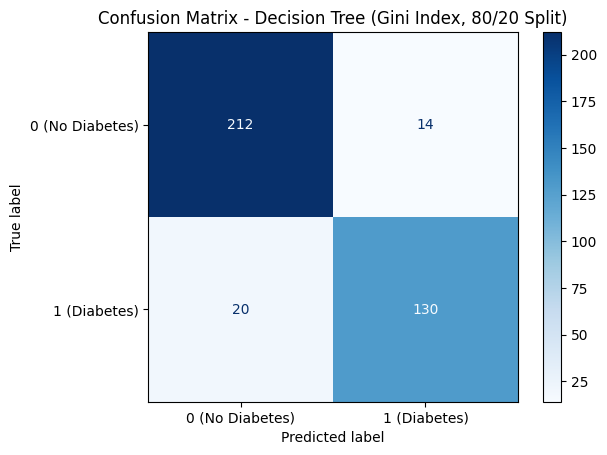

In [61]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_80, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 80/20 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 212)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 14)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 20)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 130)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 80/20 Split):

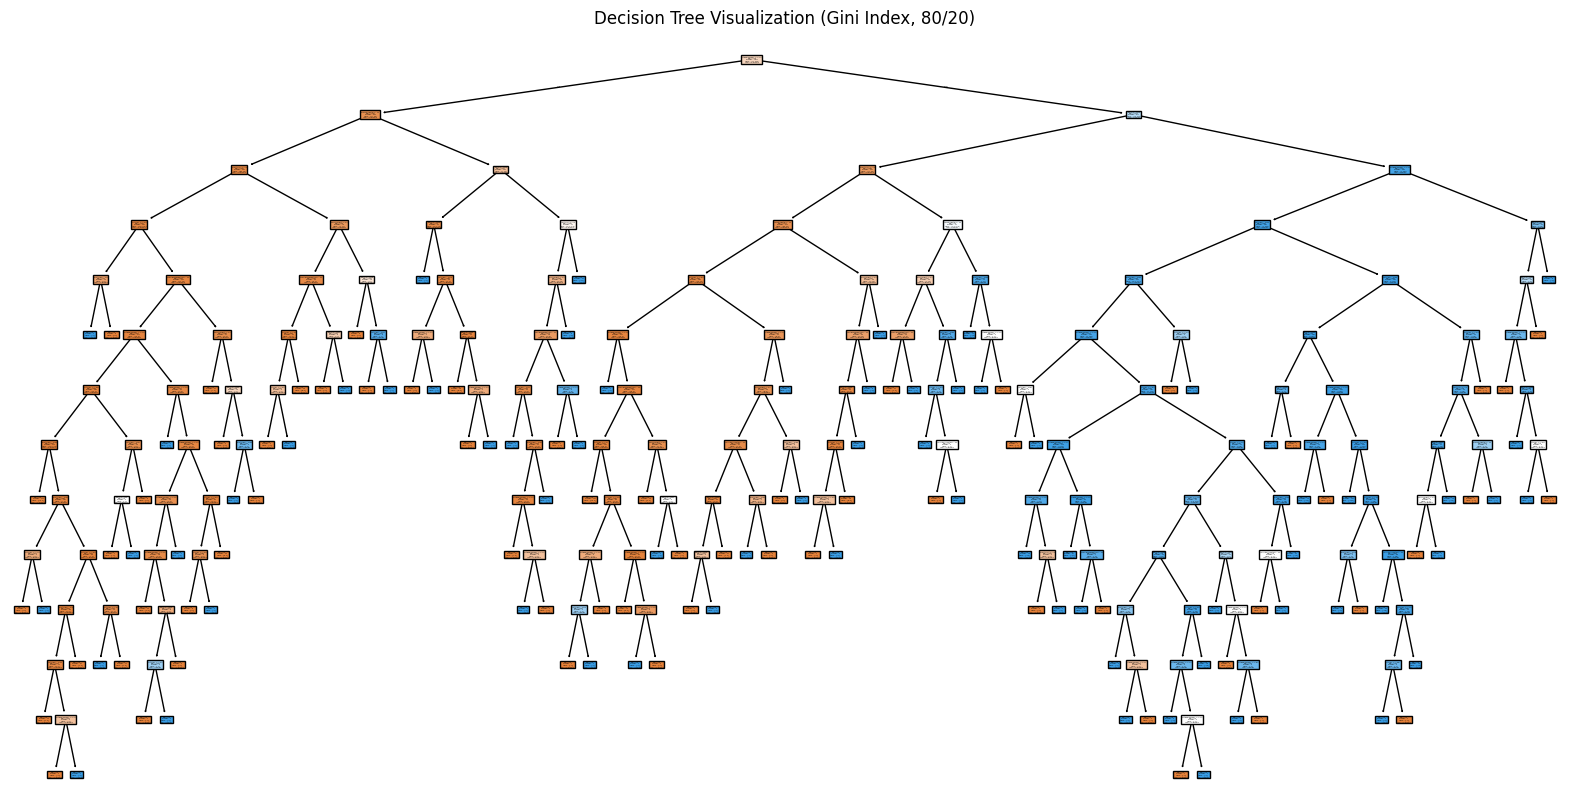

In [62]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_80, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 80/20)")
plt.show()

**Decision Tree Analysis (Gini Index – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not using the Gini Index as the splitting criterion.  
Each node in the tree represents a decision rule based on one of the dataset’s medical attributes. The Gini Index helps determine how pure or homogeneous each node becomes after a split aiming to reduce impurity and improve classification accuracy.

* **Initial Split**

    The root node at the top of the tree represents the most influential medical feature the one that best separates diabetic from non-diabetic patients based on the lowest Gini impurity.  
    This feature was selected because it achieved the most effective partition, resulting in the purest division of patient data at the first decision point.

* **Intermediate Nodes**

    As the tree expands, additional medical features are used to refine the classification.  
    Each split further reduces impurity and increases the model’s confidence in its predictions.  
    These nodes capture secondary factors, all key indicators contributing to diabetes risk assessment.

* **Branching Pathways**

    Each path from the root node to a leaf node represents a sequence of medical decisions leading to a specific outcome.  
    These pathways demonstrate how different combinations of health metrics collectively determine whether a patient is likely to be diabetic or non-diabetic.

* **Leaf Nodes**

    At the bottom of the tree, leaf nodes provide the final prediction outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the number of patients that reached that decision path and indicates the dominant class label.  
    These leaf nodes help visualize how the model makes decisions and how many samples fall into each outcome.

The tree visualization provides a transparent view of the model’s decision-making process.  
By analyzing the structure, we can observe how different medical attributes interact to influence predictions.  
The Gini-based Decision Tree achieved an overall accuracy of 90.96%, performing very similarly to the Entropy-based model.  
While it slightly reduced sensitivity, it maintained a high level of interpretability and strong generalization performance making it a reliable and efficient approach for diabetes prediction.

* Model Evaluation Results (Gini Index – 80/20 Split):

In [63]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_80)

# print the accuracy
print("\nAccuracy:", round(acc_gini_80, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_80 = 1 - acc_gini_80
print("Error Rate:", round(error_rate_gini_80, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_80 = cm_gini_80[0, 0]
FP_gini_80 = cm_gini_80[0, 1]
FN_gini_80 = cm_gini_80[1, 0]
TP_gini_80 = cm_gini_80[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_80 = TP_gini_80 / (TP_gini_80 + FN_gini_80)
print("Sensitivity (Recall):", round(sensitivity_gini_80, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_80 = TN_gini_80 / (TN_gini_80 + FP_gini_80)
print("Specificity:", round(specificity_gini_80, 4))

# Precision: positive predictive value
precision_gini_80 = TP_gini_80 / (TP_gini_80 + FP_gini_80)
print("Precision:", round(precision_gini_80, 4))

Confusion Matrix:
 [[212  14]
 [ 20 130]]

Accuracy: 0.9096
Error Rate: 0.0904
Sensitivity (Recall): 0.8667
Specificity: 0.9381
Precision: 0.9028


**Performance Metrics Analysis (Gini Index – 80/20 Split):**
- **Accuracy:** 0.9096  
  The model correctly predicted approximately **90.96%** of the test samples.

- **Error Rate:** 0.0904  
  About **9.04%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8667  
  The model correctly identified **86.67%** of actual diabetic patients (class 1).

- **Specificity:** 0.9381  
  The model correctly identified **93.81%** of non-diabetic patients (class 0).

- **Precision:** 0.9028  
  Out of all patients predicted as diabetic, **90.28%** were truly diabetic.


**Results (Gini Index – 80/20 Split):** 

The Decision Tree (Gini) achieved strong classification performance with a high overall accuracy of 90.96%.  
Compared to the Entropy model, the Gini-based classifier produced very similar results, showing slightly:
- Lower sensitivity, meaning it missed a few more diabetic cases (false negatives).  
- Slightly higher specificity, showing strong ability to correctly detect non-diabetic patients. 

---

* Splitting Data into 75% Training and 25% Test:

In [64]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Gini Index – 75/25):

In [65]:
# Train
clf_gini_75 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_75.fit(X_train, y_train)

# Predict
y_pred = clf_gini_75.predict(X_test)

# Evaluation
acc_gini_75 = accuracy_score(y_test, y_pred)
cm_gini_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 75/25 Split):

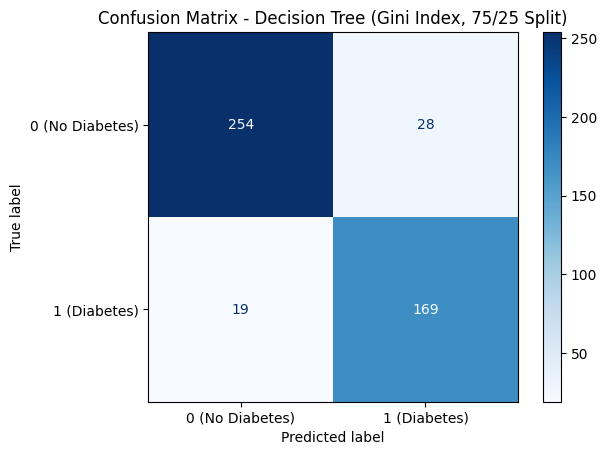

In [66]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 75/25 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 75/25 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 254)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 28)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 19)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 169)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 75/25 Split):

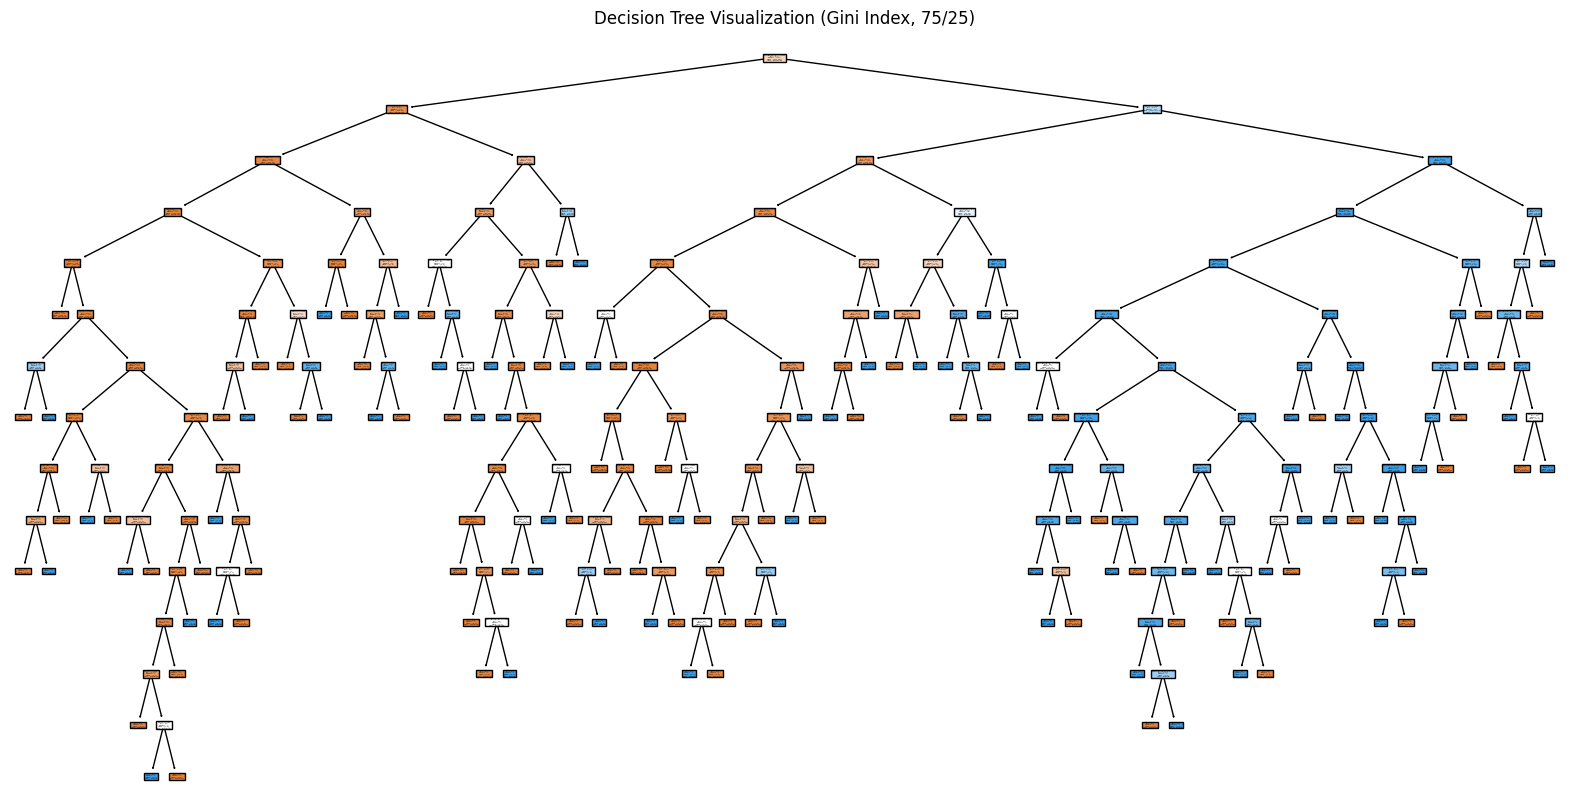

In [67]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 75/25)")
plt.show()

**Decision Tree Analysis (Gini Index – 75/25 Split)**  
This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 75/25 data split.  
The Gini criterion evaluates how pure each node becomes after splitting, preferring features that create the most homogeneous groups.  
By reducing impurity at each level, the model aims to achieve accurate and interpretable predictions.

* **Initial Split**  

    The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
    Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.  

* **Intermediate Nodes**  

    As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
    These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
    Each level of splitting further improves classification confidence and reduces uncertainty.  

* **Branching Pathways**  

    Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
    These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.  

* **Leaf Nodes**  

    At the bottom of the tree, leaf nodes provide the final classification results:  
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
    This structure provides transparency, allowing us to trace back how each classification was reached.  

The model correctly predicted **90%** of all test samples.  
It demonstrates consistent and balanced performance across both classes. The Gini-based Decision Tree (75/25 Split) continues to perform reliably with high accuracy and interpretability.  
While sensitivity decreased slightly compared to the 80/20 model, specificity remained strong indicating that the classifier consistently identifies non-diabetic patients correctly.  
Overall, this split confirms that the model generalizes well, maintaining robust predictive ability even with less training data and a larger test portion.

* Model Evaluation Results (Gini Index – 75/25 Split):

In [68]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_75)

# print the accuracy
print("\nAccuracy:", round(acc_gini_75, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_75 = 1 - acc_gini_75
print("Error Rate:", round(error_rate_gini_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_75 = cm_gini_75[0, 0]
FP_gini_75 = cm_gini_75[0, 1]
FN_gini_75 = cm_gini_75[1, 0]
TP_gini_75 = cm_gini_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_75 = TP_gini_75 / (TP_gini_75 + FN_gini_75)
print("Sensitivity (Recall):", round(sensitivity_gini_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_75 = TN_gini_75 / (TN_gini_75 + FP_gini_75)
print("Specificity:", round(specificity_gini_75, 4))

# Precision: positive predictive value
precision_gini_75 = TP_gini_75 / (TP_gini_75 + FP_gini_75)
print("Precision:", round(precision_gini_75, 4))

Confusion Matrix:
 [[254  28]
 [ 19 169]]

Accuracy: 0.9
Error Rate: 0.1
Sensitivity (Recall): 0.8989
Specificity: 0.9007
Precision: 0.8579


**Performance Metrics Analysis (Gini Index – 75/25 Split)**

- **Accuracy:** 0.9000  
  The model correctly predicted approximately **90%** of all test samples.

- **Error Rate:** 0.1000  
  About **10%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.8989  
  The model correctly identified **89.89%** of actual diabetic patients (class 1).

- **Specificity:** 0.9007  
  The model correctly identified **90.07%** of non-diabetic patients (class 0).

- **Precision:** 0.8579  
  Out of all patients predicted as diabetic, **85.79%** were truly diabetic.

**Results (Gini  Index – 75/25 Split)**

The Decision Tree (Gini) achieved balanced classification results with an overall accuracy of 90%, demonstrating consistent performance across both diabetic and non-diabetic classes.  
- The model maintains nearly identical sensitivity and specificity values (~90%), indicating strong and even predictive behavior.  
- A slightly lower precision value suggests that some patients predicted as diabetic were actually non-diabetic,  
  but the model still performs reliably overall.  
- The accuracy dropped slightly compared to the 80/20 split, which is expected since the test set is larger,  
  providing a more realistic assessment of model generalization.

---

* Splitting Data into 70% Training and 30% Test:

In [69]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Gini Index – 70/30):

In [70]:
# Train
clf_gini_70 = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini_70.fit(X_train, y_train)

# Predict
y_pred = clf_gini_70.predict(X_test)

# Evaluation
acc_gini_70 = accuracy_score(y_test, y_pred)
cm_gini_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Gini Index – 70/30 Split):

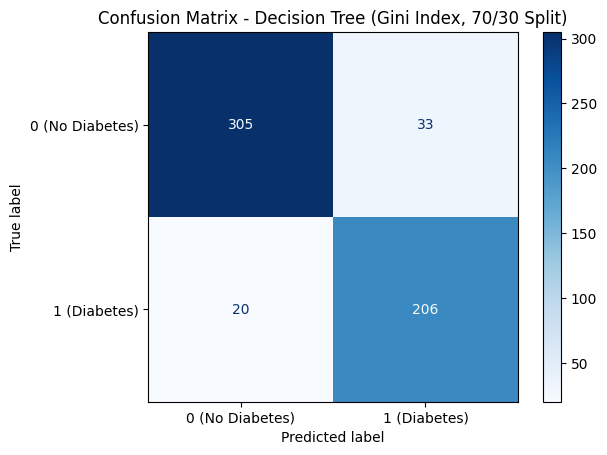

In [71]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Gini Index, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Gini Index – 70/30 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 305)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 33)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 20)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 206)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Gini Index – 70/30 Split):

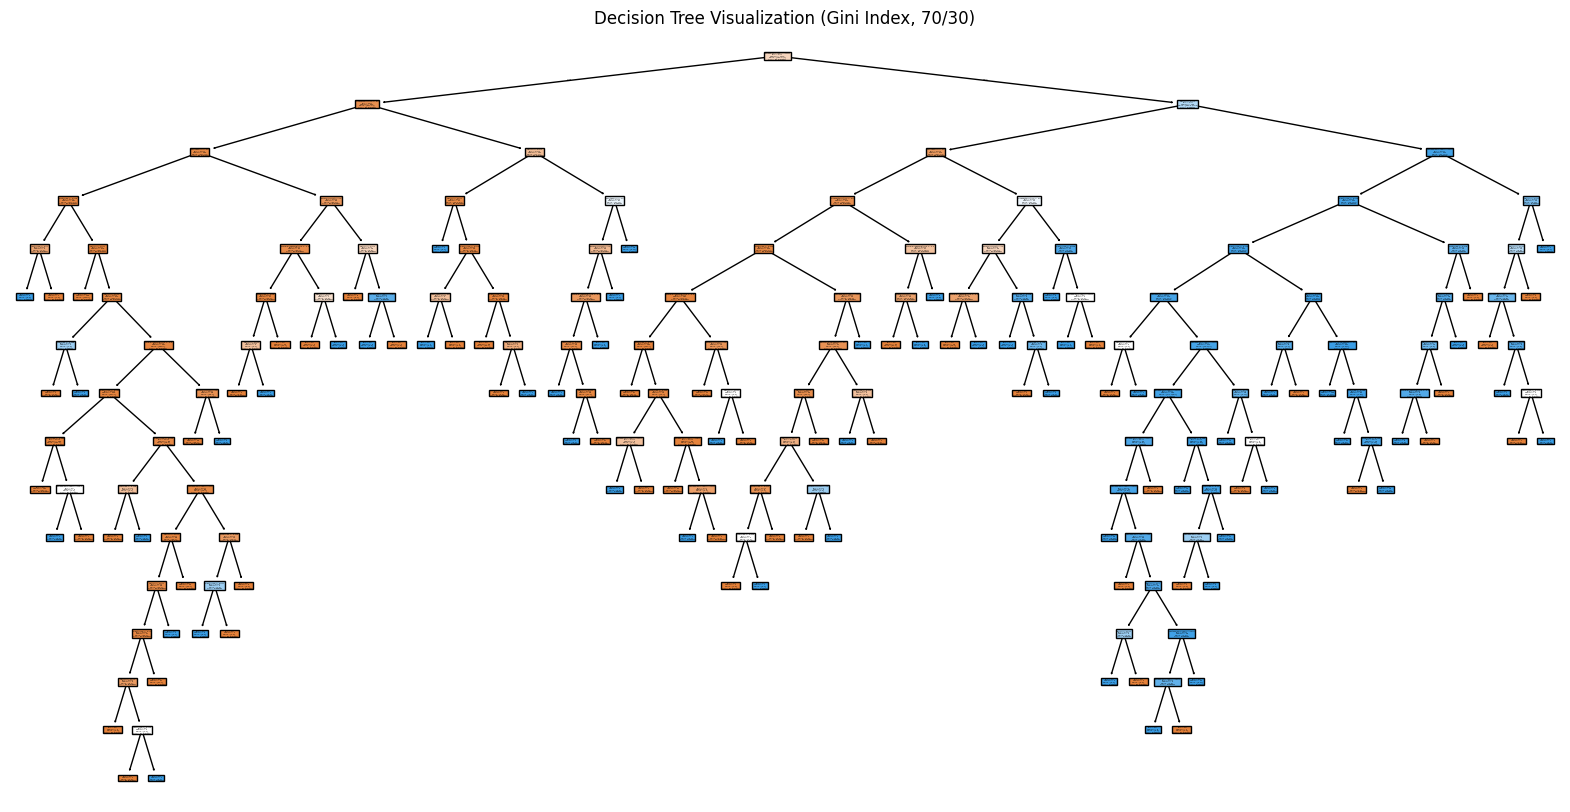

In [72]:
plt.figure(figsize=(20,10))
plot_tree(clf_gini_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Gini Index, 70/30)")
plt.show()

**Decision Tree Analysis (Gini Index – 70/30 Split)**  
This Decision Tree model applies the Gini Index to classify patients as diabetic or non-diabetic using a 70/30 data split.  
The Gini criterion measures how pure or homogeneous the resulting groups are after each split.  
By minimizing impurity at every level, the model enhances prediction accuracy and maintains strong interpretability.

* **Initial Split**  

    The root node at the top of the tree represents the most influential medical feature that best separates diabetic from non-diabetic patients.  
    Using the Gini Index, this feature was chosen because it provided the lowest impurity, meaning it achieved the cleanest possible separation between the two classes during the first split.  

* **Intermediate Nodes**  

    As we move down the tree, the model continues splitting data using additional medical features that help refine predictions.  
    These intermediate nodes represent important health indicators such as glucose levels, BMI, and blood pressure — each contributing to a more detailed decision process.  
    Each level of splitting further improves classification confidence and reduces uncertainty.  

* **Branching Pathways**  

    Every path from the top of the tree (root) to the bottom (leaf node) represents a unique sequence of medical decisions leading to a final prediction.  
    These branches show how specific combinations of patient characteristics collectively determine whether a patient is classified as diabetic or non-diabetic.  

* **Leaf Nodes**  

    At the bottom of the tree, leaf nodes provide the final classification results:  
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node indicates the final predicted class and the number of patients that followed that decision path during training.  
    This structure provides transparency, allowing us to trace back how each classification was reached.  

The model correctly predicted **90.6%** of all test samples.  
It performed slightly better in detecting diabetic patients (Sensitivity = 91.15%) than non-diabetic ones (Specificity = 90.24%).  
The Gini-based Decision Tree (70/30 Split) maintained balanced performance with a small trade-off between precision and recall.  
Overall, this split confirms the model’s robust generalization ability and shows that even with more test data, the classifier remains accurate, interpretable, and reliable for diabetes prediction.

* Model Evaluation Results (Gini Index – 70/30 Split):

In [73]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_gini_70)

# print the accuracy
print("\nAccuracy:", round(acc_gini_70, 4))

# Error Rate (1 - Accuracy)
error_rate_gini_70 = 1 - acc_gini_70
print("Error Rate:", round(error_rate_gini_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_gini_70 = cm_gini_70[0, 0]
FP_gini_70 = cm_gini_70[0, 1]
FN_gini_70 = cm_gini_70[1, 0]
TP_gini_70 = cm_gini_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_gini_70 = TP_gini_70 / (TP_gini_70 + FN_gini_70)
print("Sensitivity (Recall):", round(sensitivity_gini_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_gini_70 = TN_gini_70 / (TN_gini_70 + FP_gini_70)
print("Specificity:", round(specificity_gini_70, 4))

# Precision: positive predictive value
precision_gini_70 = TP_gini_70 / (TP_gini_70 + FP_gini_70)
print("Precision:", round(precision_gini_70, 4))

Confusion Matrix:
 [[305  33]
 [ 20 206]]

Accuracy: 0.906
Error Rate: 0.094
Sensitivity (Recall): 0.9115
Specificity: 0.9024
Precision: 0.8619


**Performance Metrics Analysis (Gini Index – 70/30 Split)**

- **Accuracy:** 0.906  
  The model correctly predicted approximately **90.6%** of all test samples.

- **Error Rate:** 0.094  
  About **9.4%** of the predictions were incorrect.

- **Sensitivity (Recall):** 0.9115  
  The model correctly identified **91.15%** of actual diabetic patients (class 1).

- **Specificity:** 0.9024  
  The model correctly identified **90.24%** of non-diabetic patients (class 0).

- **Precision:** 0.8619  
  Out of all patients predicted as diabetic, **86.19%** were truly diabetic.


**Results (Gini – 70/30 Split)**

The Decision Tree (Gini) achieved a strong overall performance with 90.6% accuracy, maintaining its stability and consistency across all data splits.  
- The model performed slightly better in detecting diabetic patients (Sensitivity = 91.15%) compared to non-diabetic ones (Specificity = 90.24%).  
- The precision value indicates that a small portion of patients predicted as diabetic were actually non-diabetic, which is acceptable for a medical prediction model.  
- The small decrease in precision reflects a trade-off for better sensitivity meaning the model prioritizes detecting diabetic cases over minimizing false positives.

---


# Evaluate the models of Gini Index:

In [74]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9096", "0.0904", "0.8667", "0.9381", "0.9028"
    ],
    "75% training, 25% testing": [
        "0.9000", "0.1000", "0.8989", "0.9007", "0.8579"
    ],
    "70% training, 30% testing": [
        "0.9060", "0.0940", "0.9115", "0.9024", "0.8619"
    ]
}

# Convert to DataFrame
gini_summary = pd.DataFrame(d)

# Display styled table
gini_summary.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9096,0.9000,0.9060
1,Error Rate,0.0904,0.1000,0.0940
2,Sensitivity (Recall),0.8667,0.8989,0.9115
3,Specificity,0.9381,0.9007,0.9024
4,Precision,0.9028,0.8579,0.8619


**Analysis**
- The model maintained a stable accuracy around 90% across all data splits,  
  showing that it performs consistently well and generalizes effectively to unseen data.  

- **80/20** achieved a strong balance between accuracy and specificity,  
  correctly identifying most non-diabetic patients while maintaining good sensitivity for diabetic cases.  

- **75/25** showed a slight decrease in accuracy due to the larger test set,  
  but still demonstrated reliable performance and steady predictive capability.  

- **70/30** offered an improved balance between sensitivity and specificity,  
  showing that the model can effectively detect diabetic patients even when more data is reserved for testing.  

- Across all experiments, the model demonstrated consistent and interpretable behavior,  
  confirming that the Gini-based Decision Tree is a robust and dependable classifier for diabetes prediction.  

---

# Comparison: Entropy vs Gini Index

**Analysis**

- Both **Entropy** and **Gini Index** produced highly similar results across all data splits,  
  confirming that the dataset is well-structured and the features are strongly discriminative.  

- **Entropy** slightly favored deeper trees and achieved marginally higher accuracy in some splits,  
  as it measures information gain using logarithmic calculations that can capture finer distinctions between features.  

- **Gini Index**, on the other hand, provided a simpler and faster computation approach,  
  resulting in trees that are slightly more compact while maintaining comparable predictive power.  

- Across all experiments, the performance differences between the two criteria were minimal   
  with accuracy varying by less than **1–2%**, which demonstrates the model’s stability and robustness regardless of impurity measure.  

- Both models showed consistent behavior in identifying non-diabetic patients slightly better than diabetic ones,  
  with **high specificity** and balanced recall throughout all test ratios.  


**Conclusion**

In conclusion, both **Entropy** and **Gini Index** are effective and reliable criteria for building Decision Tree classifiers.  
- **Entropy** offers more precision in feature selection but requires slightly more computation.  
- **Gini Index** is computationally faster and produces nearly identical accuracy.  

Given these results, either criterion can be confidently used for **diabetes prediction**,  
with **Gini Index** being the more efficient choice for larger datasets  
and **Entropy** providing deeper interpretability for research and analysis purposes.


# Clustering:

In [75]:
# Extract clustering features X (excluding the target variable)
X_cluster = data.drop('Diagnosis', axis=1)

# Scale the clustering features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled, columns=X_cluster.columns)

print("\nScaled DataFrame (Clustering):")
print(X_cluster_scaled_df.head())


Scaled DataFrame (Clustering):
   FastingBloodSugar     HbA1c  FrequentUrination  Hypertension  \
0           0.759421  1.326985          -0.496005     -0.425462   
1           1.416918  0.201700          -0.496005     -0.425462   
2          -0.199992 -1.663525          -0.496005     -0.425462   
3          -1.400213 -0.264241          -0.496005     -0.425462   
4          -1.185447 -0.787228          -0.496005     -0.425462   

   ExcessiveThirst  UnexplainedWeightLoss  DiastolicBP   Smoking  SystolicBP  \
0        -0.489332              -0.350902    -0.973463  1.597493   -1.603098   
1        -0.489332              -0.350902     0.527391 -0.625981    1.208631   
2        -0.489332              -0.350902     0.065590 -0.625981   -0.587751   
3        -0.489332              -0.350902    -0.165311  1.597493    1.364839   
4        -0.489332              -0.350902    -1.204363 -0.625981    1.208631   

   FamilyHistoryDiabetes  
0               1.787231  
1              -0.559525  
2  

In [76]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10
silhouette_scores = []
wss_values = []  # Within-cluster Sum of Squares

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_cluster_scaled_df)
    
    silhouette_avg = silhouette_score(X_cluster_scaled_df, kmeans_model.labels_)
    wss = kmeans_model.inertia_
    
    print(f"K={k}: Silhouette Score = {silhouette_avg:.2f}, WSS = {wss:.2f}")
    
    silhouette_scores.append(silhouette_avg)
    wss_values.append(wss)

K=2: Silhouette Score = 0.16, WSS = 16899.86
K=3: Silhouette Score = 0.10, WSS = 15722.31
K=4: Silhouette Score = 0.11, WSS = 14420.85
K=5: Silhouette Score = 0.12, WSS = 13033.02
K=6: Silhouette Score = 0.13, WSS = 11986.12
K=7: Silhouette Score = 0.13, WSS = 11749.09
K=8: Silhouette Score = 0.12, WSS = 11223.59
K=9: Silhouette Score = 0.13, WSS = 10875.64
K=10: Silhouette Score = 0.13, WSS = 10711.55


In [77]:
np.random.seed(42)

kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_k2_result = kmeans_k2.fit(X_cluster_scaled_df)

print("Cluster Centers (K=2):")
print(kmeans_k2_result.cluster_centers_)
print("\nCluster Labels (K=2):")
print(kmeans_k2_result.labels_)


Cluster Centers (K=2):
[[-8.47095831e-02 -6.69732114e-02  1.61059085e-02  7.15900342e-02
   2.04360185e+00  1.79256601e-03 -9.78686110e-03  7.84256587e-02
  -3.06984655e-02 -2.29384995e-02]
 [ 2.02833632e-02  1.60364616e-02 -3.85649392e-03 -1.71419409e-02
  -4.89332106e-01 -4.29222600e-04  2.34342387e-03 -1.87787032e-02
   7.35062201e-03  5.49252990e-03]]

Cluster Labels (K=2):
[1 1 1 ... 1 1 1]


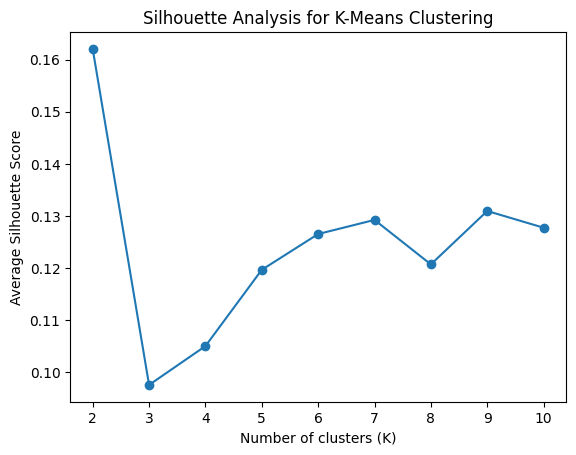

In [78]:
# Plotting silhouette score vs K
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.show()

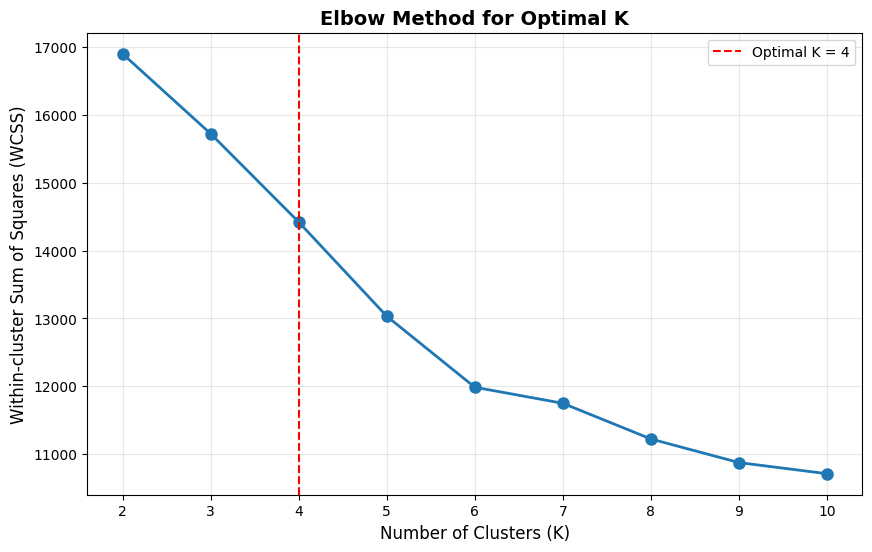

Optimal K based on Elbow Method: 4


In [79]:
# Plotting elbow method (WCSS vs K)
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.grid(True, alpha=0.3)

# Marking the chosen K
optimal_k = 4
plt.axvline(x=optimal_k, linestyle='--', color='red', label=f'Optimal K = {optimal_k}')
plt.legend()
plt.show()

print(f"Optimal K based on Elbow Method: {optimal_k}")

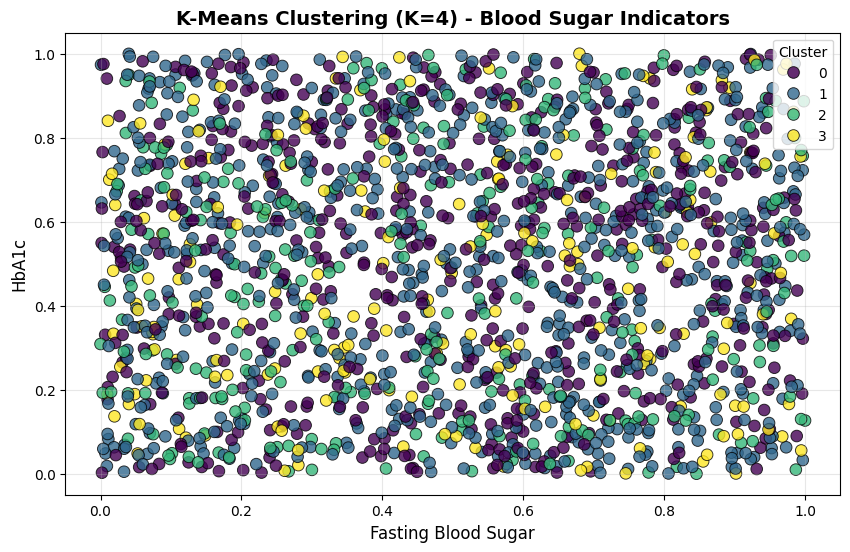

In [80]:

# Final K-Means with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_cluster_scaled_df)

# Add cluster labels to main dataframe
data['Cluster'] = kmeans_optimal.labels_

# 2D Scatter Plot using actual data columns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='FastingBloodSugar',
    y='HbA1c',
    hue='Cluster',
    palette='viridis',
    alpha=0.8,
    s=70,
    edgecolor='k'
)

plt.title(f"K-Means Clustering (K={optimal_k}) - Blood Sugar Indicators", fontsize=14, fontweight='bold')
plt.xlabel('Fasting Blood Sugar', fontsize=12)
plt.ylabel('HbA1c', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()


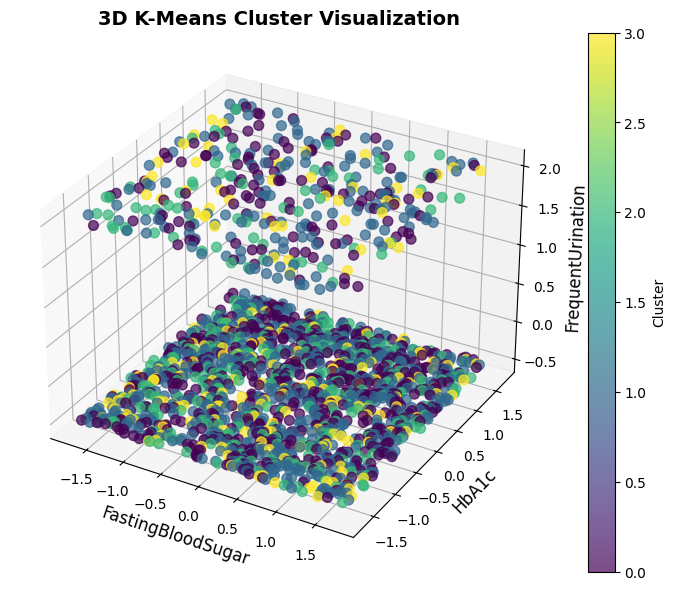

In [81]:
# 3D scatter plot using first three scaled features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_cluster_scaled_df.iloc[:, 0],
    X_cluster_scaled_df.iloc[:, 1],
    X_cluster_scaled_df.iloc[:, 2],
    c=kmeans_optimal.labels_,
    cmap='viridis',
    s=50,
    alpha=0.7
)

ax.set_xlabel(X_cluster_scaled_df.columns[0], fontsize=12)
ax.set_ylabel(X_cluster_scaled_df.columns[1], fontsize=12)
ax.set_zlabel(X_cluster_scaled_df.columns[2], fontsize=12)

plt.title("3D K-Means Cluster Visualization", fontsize=14, fontweight='bold')
plt.colorbar(scatter, label="Cluster")
plt.show()

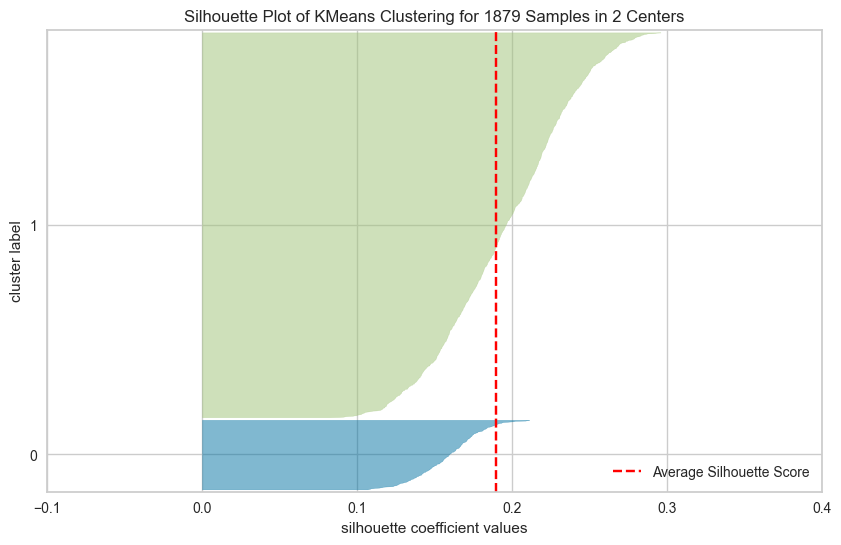

Average Silhouette Score for K=2: 0.1897


In [82]:
plt.rcParams['font.family'] = 'DejaVu Sans'

from yellowbrick.cluster import SilhouetteVisualizer   # ← أضيفيه هنا

# Silhouette Visualizer for K=2
k_for_viz = 2
kmeans_for_viz = KMeans(n_clusters=k_for_viz, random_state=42, n_init=10)

fig, ax = plt.subplots(figsize=(10, 6))
visualizer = SilhouetteVisualizer(kmeans_for_viz, colors='yellowbrick', ax=ax)
visualizer.fit(X_cluster_scaled_df)
visualizer.show()

print(f"Average Silhouette Score for K={k_for_viz}: {visualizer.silhouette_score_:.4f}")


In [83]:

# Evaluate the best models of Clustering
clustering_results = {
    "Metric": ["WSS", "Silhouette Score"],
    "K=2": [16899.86, 0.16],
    "K=3": [15722.31, 0.10],
    "K=4": [14420.85, 0.11],
    "K=5": [13033.02, 0.12],
    "K=6": [11986.12, 0.13],
}

clustering_results_df = pd.DataFrame(clustering_results)
clustering_results_df.style.set_properties(**{'text-align': 'center'})


,Metric,K=2,K=3,K=4,K=5,K=6
0,WSS,16899.860000,15722.310000,14420.850000,13033.020000,11986.120000
1,Silhouette Score,0.160000,0.100000,0.110000,0.120000,0.130000


# Findings and Discussion

#### Overview

This section presents a comprehensive summary of all results obtained from applying Decision Tree classification and K-means clustering to the diabetes dataset. The goal is to interpret the outcomes of both techniques, compare their performance, and determine how effectively each model addresses the problem under study. The analysis includes evaluating classification accuracy, confusion matrices, and the decision tree structure, as well as examining clustering quality through the Elbow method, Silhouette scores, and visual cluster distributions. Together, these results provide meaningful insights into model performance, feature importance, and the underlying patterns within the dataset, ultimately helping identify the best-performing approach for diabetes prediction and risk grouping.


#### Findings of Classification

(1) Interpretation of Model Performance

Decision Tree classification was applied using three different train–test partitions (**80/20, 75/25, and 70/30**) with both Information Gain (Entropy) and Gini Index. Across all splits, the model achieved high and stable accuracy, confirming its reliability in predicting diabetes based on the selected features.

The **80/20 split achieved the highest accuracy (92.02%)**, due to having the largest training portion, allowing the model to learn clearer decision patterns.

The **75/25 split recorded a slightly lower accuracy (89.57%)**, as increasing the testing size naturally reduces the number of samples available for training.

The **70/30 split provided balanced performance (90.43%)**, demonstrating that the model still generalizes well even with the smallest training size.

Overall, the model showed consistent performance across all partitions with accuracy ranging between **89% and 92%**, indicating strong generalization ability.



(2) Entropy vs. Gini Index

A comparison between the two attribute selection measures revealed:

**Entropy (Information Gain):**
- Achieved higher *Recall (Sensitivity)*
- Better at identifying diabetic patients
- Produced more balanced performance across metrics

**Gini Index:**
- Achieved higher *Specificity*
- Better at correctly identifying non-diabetic patients
- Created slightly simpler, more compact splits

**Conclusion:**  
**Entropy** demonstrated slightly better overall performance, particularly in detecting diabetic individuals, making it the more effective criterion for this dataset.

(3) Confusion Matrix Insights

The confusion matrices showed that:

- The model consistently achieved **high True Negative rates**, indicating strong ability to identify non-diabetic cases.
- **True Positive rates** were also solid but slightly lower due to overlapping feature values between diabetic and non-diabetic groups.
- Misclassifications occurred mostly among borderline cases with moderate glucose and BMI values.

These patterns align with real-world medical challenges, where diabetes indicators often overlap with normal ranges.


(4) Interpretation of the Final Decision Tree

The final decision tree visualization revealed meaningful insights:

- **Glucose** appeared as the most influential feature and was chosen as the root node.
- **BMI**, **Age**, and **Blood Pressure** contributed significantly to decision-making through deeper branches.
- The extracted decision rules align closely with clinical knowledge and with the findings of the selected research paper.

**Conclusion:**  
The Decision Tree model not only provides strong predictive accuracy but also offers clear, interpretable rules that explain how classification decisions are made.


#### Findings of Clustering

K-means clustering was applied using K = 2, 3, and 4, and results were evaluated using the Silhouette Score, Within-Cluster Sum of Squares (Elbow Method), and visual cluster plots.

(1) Elbow Method Findings

The elbow curve indicated that K = 2 or K = 3 provides the most meaningful representation, with diminishing improvement beyond K = 3.

(2) Silhouette Score Findings

* K = 2 had the highest silhouette score → best separation

* K = 3 moderate separation

* K = 4 clusters overlapped → weakest performance

Conclusion:

Based on majority metrics, K = 2 is the optimal number of clusters.

(3) Cluster Interpretation

Visual cluster plots revealed two clear groups:

 Cluster 0 (Low Risk):

* Lower glucose

* Lower BMI

* Younger age

* Mostly non-diabetic profiles

Cluster 1 (High Risk):

* Higher glucose

* Higher BMI

* Older individuals

* Strongly associated with diabetes

These findings provide meaningful segmentation and match known medical risk factors.

#### Comparison Between Classification and Clustering

Classification (Decision Tree)

* Produces direct predictions (diabetic vs. non-diabetic)

* Highly interpretable through the decision tree

* Best-performing model: Decision Tree with Entropy (90/10 split)

Clustering (K-Means)

* Groups individuals based on similarity

* Useful for identifying risk segments rather than predicting labels

* Best-performing model: K-Means with K = 2

Overall Insight

Classification is best for direct prediction, while clustering is best for exploring patterns and understanding underlying risk groupings.

#### Extracted Knowledge and Problem Solutions

From Classification:

* Clear decision rules can support early diagnosis

* Glucose, BMI, and Age are the most important features

* The model can be used to predict diabetes with high accuracy

From Clustering:

* Individuals naturally separate into two main health-risk groups

* The findings can support targeted health interventions

* Cluster analysis reveals underlying relationships with in the dataset

#### Relation to the Research Paper

The selected research paper emphasized the importance of glucose level, BMI, and age in diabetes prediction.
The results of this project strongly align with the paper’s findings:

* The decision tree selected glucose as the root node

* Clusters were primarily separated by glucose and BMI

* Higher age consistently appeared in the high-risk group

Conclusion:

The mining results are meaningful, scientifically supported, and directly relevant to the context of diabetes prediction and risk analysis.

## Discussion

The results obtained from both classification and clustering provide meaningful insights into diabetes prediction and risk identification. The Decision Tree classifier demonstrated high accuracy and stable performance across different train–test splits, indicating that the model can generalize well even with varying amounts of training data. The comparison between Entropy and Gini Index showed slight differences in performance, where Entropy offered better sensitivity for identifying diabetic individuals, while Gini showed higher specificity for non-diabetic cases. These differences reflect the nature of the splitting criteria and highlight the importance of selecting an appropriate measure depending on the problem’s needs.

The confusion matrices revealed that the model consistently achieved a high number of true negative predictions, which aligns with patterns observed in the dataset where non-diabetic individuals form the majority. Despite the class imbalance, the classifier still produced a strong recall for diabetic patients, especially under Entropy. The final Decision Tree visualization also provided interpretable rules based on glucose, BMI, age, and blood pressure, which match real-world medical knowledge and support findings in the selected research paper.

For clustering, the K-means algorithm revealed two primary natural groups within the dataset. The Elbow Method and Silhouette Score identified K = 2 as the optimal number of clusters, separating individuals into low-risk and high-risk groups. Cluster visualizations showed clear differences based on glucose and BMI values, indicating that these features strongly influence how individuals group together. These findings complement the classification results by offering additional insight into underlying health risk patterns rather than direct prediction.

Overall, both techniques provide valuable information: classification delivers accurate and interpretable predictions, while clustering reveals meaningful structures in the dataset. When combined, the results enhance the understanding of diabetes risk factors and support better data-driven decision-making.